## Questão 1 - Páginas de livros didáticos

Considere uma população de livros didáticos com aproximadamente o mesmo tamanho físico. Nessa população, considere que a característica (isto é, a variável) de interesse é a quantidade de páginas contida em cada livro. Sendo assim, a população subjacente corresponde a um conjunto de valores numéricos inteiros positivos (correspondentes à quantidade de páginas de cada livro).


Nesta parte do trabalho, você irá abordar a situação descrita acima como um problema de Probabilidade, e não como um problema de Estatística. Em um problema de Probabilidade, normalmente supõe-se que é conhecida a distribuição da população (o que não acontece em um problema de Estatística).
Assim, considere que a variável aleatória correspondente é a quantidade de páginas em um livro da população, e que essa variável segue uma distribuição uniforme discreta nos inteiros de 150 até 300. Isso significa que um livro pode ter no mínimo 150 e no máximo 300 páginas, com igual probabilidade para qualquer quantidade de páginas nesse intervalo.

(i) Esboce um gráfico (histograma) da distribuição da população com relação
à característica quantidade de páginas.

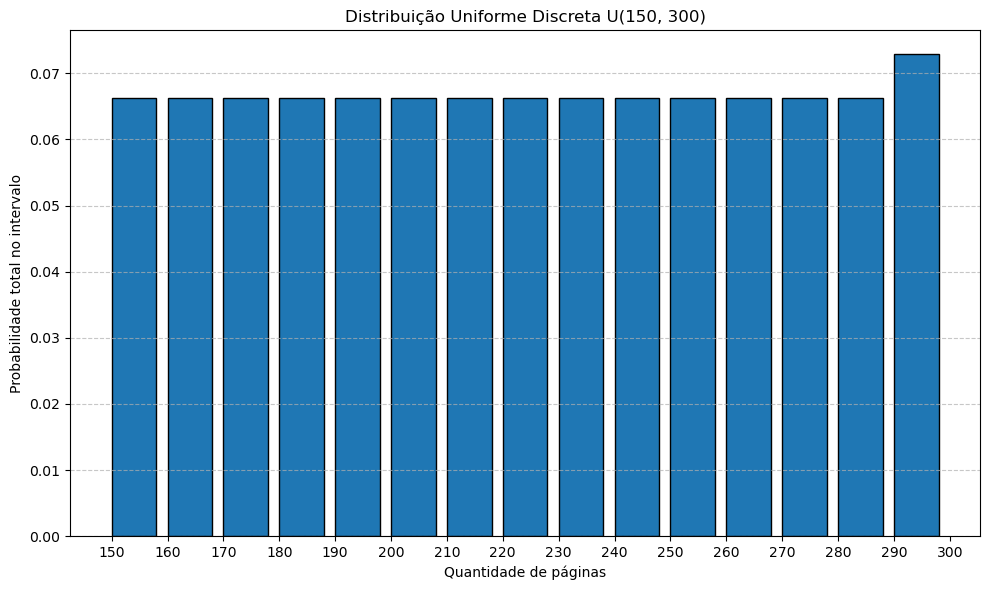

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Intervalo da variável aleatória discreta
valores = np.arange(150, 301)

# Vamos definir a distribuição uniforme de probabilidades,
# onde cada barra tem probabilidade de 1/n
probabilidades = np.ones_like(valores) / len(valores)


# Agrupando os dados de 10 em 10 para conseguir plotar adequadamente
bins = np.arange(150, 310, 10)  # até 300, passo de 10
hist, edges = np.histogram(valores, bins=bins, weights=probabilidades)

# Plotando o histograma agrupado
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=8, align='edge', edgecolor='black')
plt.xlabel('Quantidade de páginas')
plt.ylabel('Probabilidade total no intervalo')
plt.title('Distribuição Uniforme Discreta U(150, 300)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins)

plt.tight_layout()
plt.show() # como len(valores) = 151, o último intervalo possui mais valores que os outros


Intervalo da variável aleatória discreta
valores = np.arange(150, 301)

Vamos definir a distribuição uniforme de probabilidades,
onde cada barra tem probabilidade de 1/n

Agrupando os dados de 10 em 10 para conseguir plotar adequadamente

Plotando o histograma agrupado

como len(valores) = 151, o último intervalo possui mais valores que os outros


(ii) Encontre a média (μ), a variância (σ2) e o desvio padrão (σ) da
distribuição da população.

In [22]:
import math

mean = (valores[0] + valores[-1])/2

variance = ((valores[-1] - valores[0] + 1)**2 - 1)/12 # formula de variância para dist uniforme

desv_padrao = math.sqrt(variance)


print(f"Média: {mean}")
print(f"Variância: {variance}")
print(f"Desvio padrão: {desv_padrao}")


Média: 225.0
Variância: 1900.0
Desvio padrão: 43.58898943540674



formula de variância para dist uniforme

variance = ((valores[-1] - valores[0] + 1)**2 - 1)/12 

(iii) Considere que o plano amostral utilizado é uma amostragem aleatória simples com reposição (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa população e calcular a média de cada amostra. Para cada amostra, você terá uma estatística pontual (a média amostral x). Ao gerar todas as possíveis
amostras aleatórias de tamanho 2, a distribuição de todas essas médias constitui a distribuição amostral da média (sampling distribution of the sample mean) para n = 2.


Primeiro, implemente uma função que gere todas as possíveis amostras de tamanho 2 com reposição, e compute a média de cada uma. Em seguida, usando os valores das médias obtidas, esboce um histograma da distribuição amostral da média.

22801


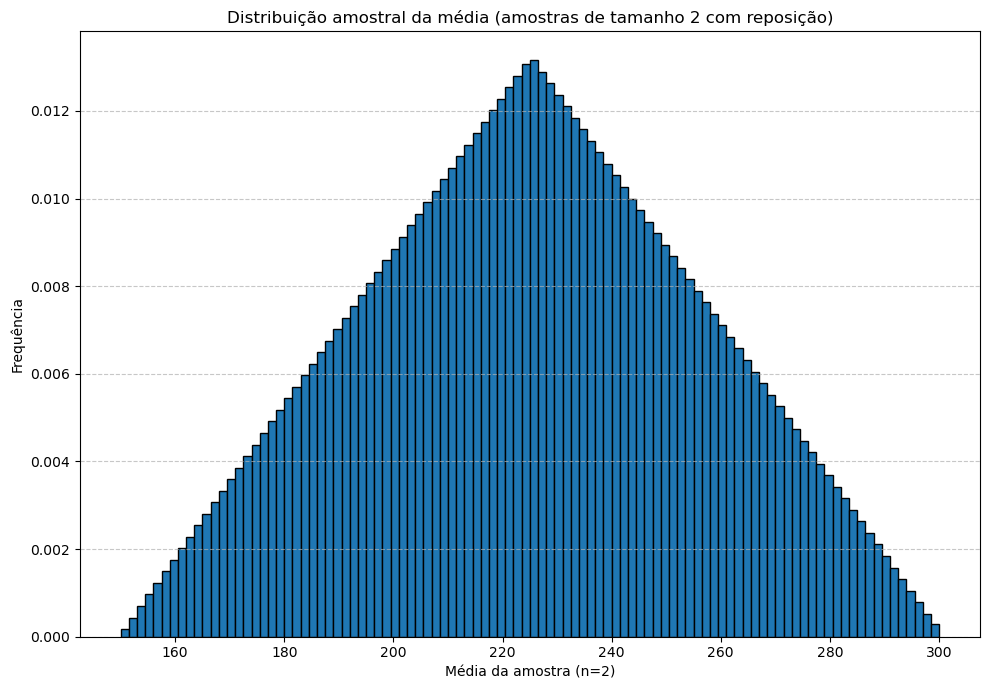

In [ ]:
from numpy.random import seed
from itertools import product

seed(1)


# Gerando todas as combinações de tamanho 2 com reposição
amostras = product(valores, repeat=2)


# Calculando a média de cada amostra
medias_amostrais = np.array([(x + y) / 2 for x, y in amostras])


print(len(medias_amostrais))

plt.figure(figsize=(10,7))
plt.hist(medias_amostrais, bins=100, edgecolor='black', density=True)
plt.xlabel('Média da amostra (n=2)')
plt.ylabel('Frequência')
plt.title('Distribuição amostral da média (amostras de tamanho 2 com reposição)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




seed(1) --> para reprodutibilidade


Gerando todas as combinações de tamanho 2 com reposição
`product(valores, repeat=2)`


quando calculamos a média de pares desses valores, o histograma resultante
começa a se aproximar de uma distribuição triangular, que possui densidade em torno 
da média central da distribuição original.


(iv) Calcule a média, a variância e o desvio padrão

In [ ]:
import math

print(f"Média: {medias_amostrais.mean()}") 
print(f"Variância: {medias_amostrais.var()}")
print(f"Desvio Padrão: {math.sqrt(medias_amostrais.var())}")

Média: 225.0
Variância: 950.0
Desvio Padrão: 30.822070014844883


Fazemos os cálculos com o uso do método .mean() , .var() e a função math.sqrt() da variância

(v) O Teorema Central do Limite fornece expressões teóricas para os valores esperados da média e do desvio padrão da distribuição amostral da média x. Use essa teoria e os valores do item (ii) para calcular esses parâmetros no caso de n = 2, e compare com os resultados obtidos no item (iv).

In [ ]:
# Esperança (média) da distribuição
# No TCL, E(X) = μ
print(f"Média da população: {valores.mean()}")
# Igual a média encontrada anteriormente

# Podemos aproximar o Desvio padrão da população = s / sqrt(n)
variance = ((valores[-1] - valores[0] + 1)**2 - 1)/12


print(f"Desvio padrão da população: {math.sqrt(variance)/math.sqrt(2):.4f}")
print(f"Desvio padrão encontrado no item iv: {math.sqrt(medias_amostrais.var()):.4f}")



Média da população: 225.0
Desvio padrão da população: 30.82
Desvio padrão encontrado no item iv: 30.82


Esperança (média) da distribuição:
No TCL, E(X) = μ
valores.mean() possui média igual a média encontrada anteriormente

Pelo TCL, podemos aproximar o Desvio padrão da população = s / sqrt(n)


print(f"Desvio padrão da população: {math.sqrt(variance)/math.sqrt(2):.4f}")
print(f"Desvio padrão encontrado no item iv: {math.sqrt(medias_amostrais.var()):.4f}")



(vi) Agora, suponha que desejamos estudar a distribuição amostral da média
para amostras de tamanho n = 9.

- Quantas amostras diferentes de tamanho 9 podem ser geradas a
partir da população? Essa tarefa é viável de ser feita manualmente
ou com auxílio computacional?
- Gere uma distribuição amostral empírica da média (uma aproximação
da distribuição teórica) para n = 9.
Dica: gere uma grande quantidade de amostras aleatórias e construa
um histograma com as médias amostrais obtidas.

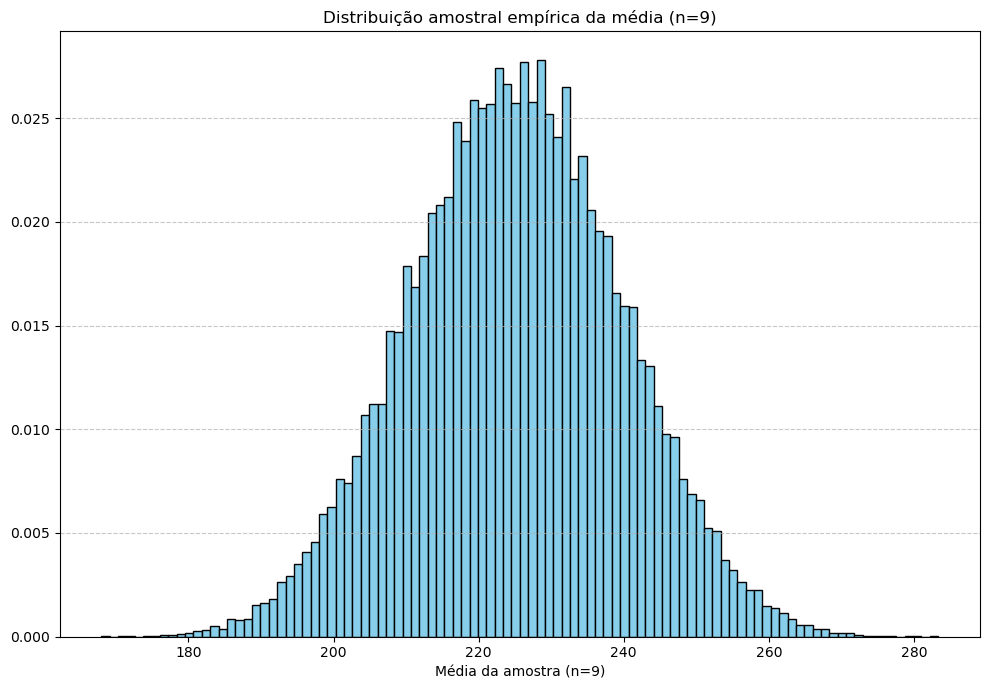

In [53]:
from numpy.random import seed, choice


seed(1)


# Número de amostras a serem geradas --> quanto maior, mais suave a distribuição
num_amostras = 100000 

# Tamanho da amostra
n = 9

# Ao gerar todas as combinações de tamanho 9 com reposição, teríamos 151^9 combinações diferentes, 
# o que é inviável manualmente. Porém computacionalmente é possível.
amostras = choice(valores, size=(num_amostras, n), replace=True)

# Calculando a média de cada amostra
medias_amostrais = amostras.mean(axis=1)

# Plotando o histograma da distribuição amostral
plt.figure(figsize=(10,7))
plt.hist(medias_amostrais, bins=100, edgecolor='black', density=True, color='skyblue')
plt.xlabel('Média da amostra (n=9)')
plt.title('Distribuição amostral empírica da média (n=9)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Número de amostras a serem geradas --> quanto maior, mais suave a distribuição
`num_amostras = 100000 `

Tamanho da amostra
`n = 9`

Ao gerar todas as combinações de tamanho 9 com reposição, teríamos 151^9 combinações diferentes, 
o que é inviável manualmente. Porém computacionalmente é possível.
`amostras = choice(valores, size=(num_amostras, n), replace=True)`

Calculando a média de cada amostra
`medias_amostrais = amostras.mean(axis=1)`

Por fim, plotando o histograma da distribuição amostral, agora em forma de dist Normal

## Questão 2: Problema dos Tanques Alemães

Durante um conflito fictício, o serviço de inteligência de um país deseja estimar a quantidade total de veículos blindados produzidos por um país adversário. Esses veículos são numerados sequencialmente a partir de 1 (por
exemplo: 1, 2, 3, ..., N), e alguns deles foram capturados no campo de batalha.

Suponha que foram capturados aleatoriamente k = 5 tanques com os seguintes números de série:
{17, 32, 45, 59, 88}

Objetivo: estimar o número total N de tanques produzidos pelo inimigo, usando métodos estatísticos apropriados.

(i) Apresente uma estimativa pontual de N com base na amostra coletada, usando o seguinte estimador clássico:
    
N = M + M/K -1

onde M é o maior número observado na amostra, e k é o tamanho da amostra.

In [33]:
amostra = [17, 32, 45, 59, 88]
M = max(amostra)
N = M + M/len(amostra) - 1
print(N)

104.6


a fórmula dada pelo enunciado `N = M + M/len(amostra) - 1` trouxe como resposta 104,6

(ii) Implemente (ou descreva) uma simulação computacional que reproduza o processo de amostragem aleatória de k = 5 tanques a partir de uma população com N = 100 tanques numerados sequencialmente. Repita esse processo muitas vezes (por exemplo, 10.000 vezes) e registre as estimativas N em cada simulação.

In [35]:
import numpy as np


def problema_dos_tanques(k):
    N = 100
    tanques = np.arange(1,N+1) # tanques com série de 1 a 100
    
    simulacoes = 10000  # número de repetições

    estimativas = []

    # Simulações
    for _ in range(simulacoes):
        amostra = np.random.choice(tanques, size=k)
        M = np.max(amostra)
        N_est = M + (M / k) - 1
        estimativas.append(N_est)

    estimativas = np.array(estimativas)
    return estimativas



In [36]:
from numpy.random import seed


seed(1)
k = 5 # tamanho da amostra
estimativas = problema_dos_tanques(k)
print(estimativas[:10])

[ 90.2  95.   91.4 101.  104.6 115.4  75.8  97.4 105.8  85.4]


a função `def problema_dos_tanques(k):` toma como parâmetro o `k`, que é o tamanho da amostra e retorna as estimativas, um numpy array com a função de estimativa dada pelo enunciado `N = M + M/len(amostra) - 1` para 10.000 simulações de uma `amostra` que varia aleatoriamente de 1 a 100.

(iii) Construa um histograma com as estimativas obtidas na simulação do item anterior e analise o comportamento do estimador N . Ele é viesado? Subestima ou superestima frequentemente o verdadeiro valor de N?

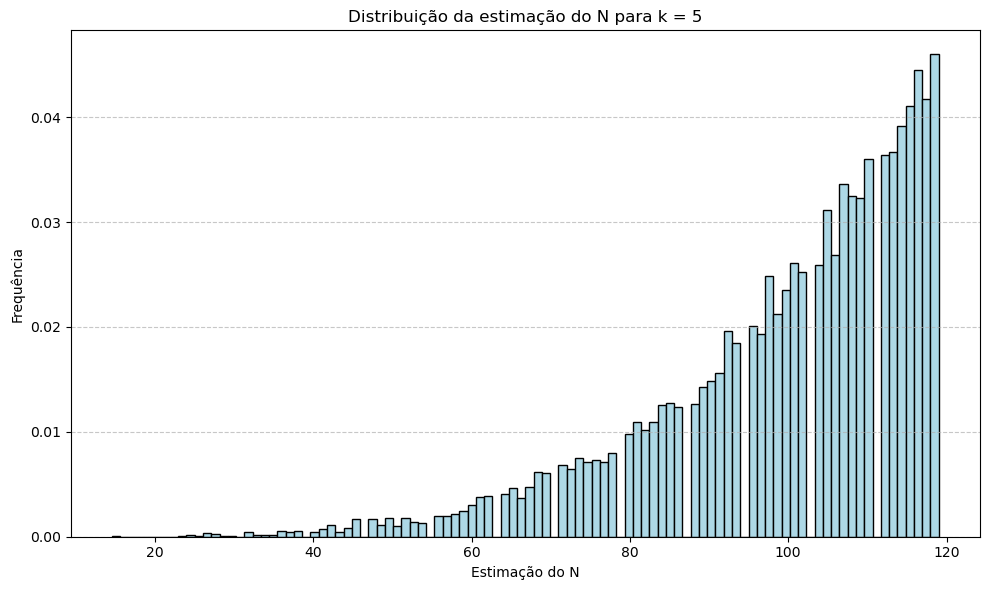

In [42]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))

# histograma com as estimativas, agrupando em bins de 100
plt.hist(estimativas, bins=100, color='lightblue', edgecolor='black', density=True)
plt.xlabel('Estimação do N')
plt.ylabel('Frequência')
plt.title('Distribuição da estimação do N para k = 5')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Usamos a biblioteca do matplotlib.pyplot pra construir o histograma.


histograma com as estimativas, agrupando em bins de 100.

Supondo que o valor real seja 100, podemos ver que geralmente o algoritmo retorna mais frequentemente valores acima de 100 (indo até próximo de 120), para k = 5.

Superestima levemente o valor real do número de série máximo.


(iv) Calcule a média, a variância e o desvio padrão das estimativas geradas pela simulação. Compare com o valor real de N = 100 e discuta os resultados.

In [43]:
import math

print("Média: ", estimativas.mean())
print("Variância: ", estimativas.var())
print("Desvio padrão: ", math.sqrt(estimativas.var()))

Média:  99.51632
Variância:  284.89466165759995
Desvio padrão:  16.878822875354786


média utilizando o método mean().

variância utilizando o método var().

(v) Agora, repita a simulação para diferentes tamanhos de amostra (k = 2, 5, 10, 20). Como o tamanho da amostra influencia a qualidade da estimativa de N?

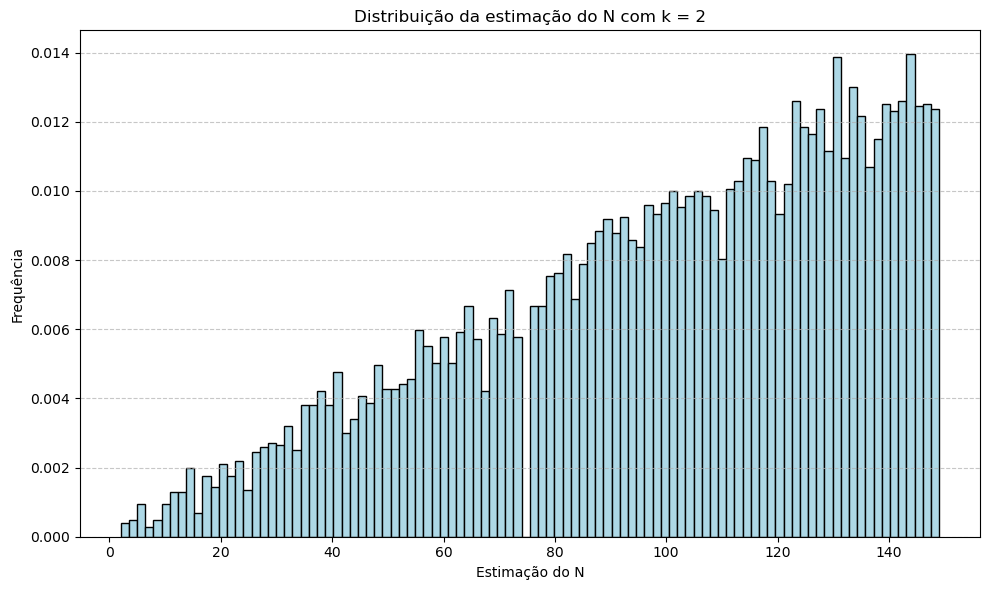

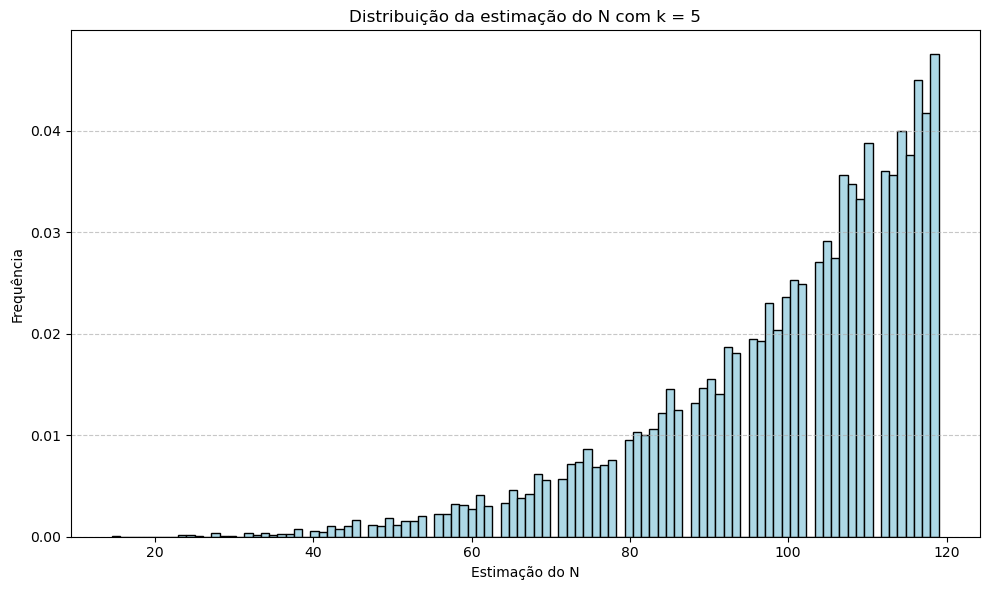

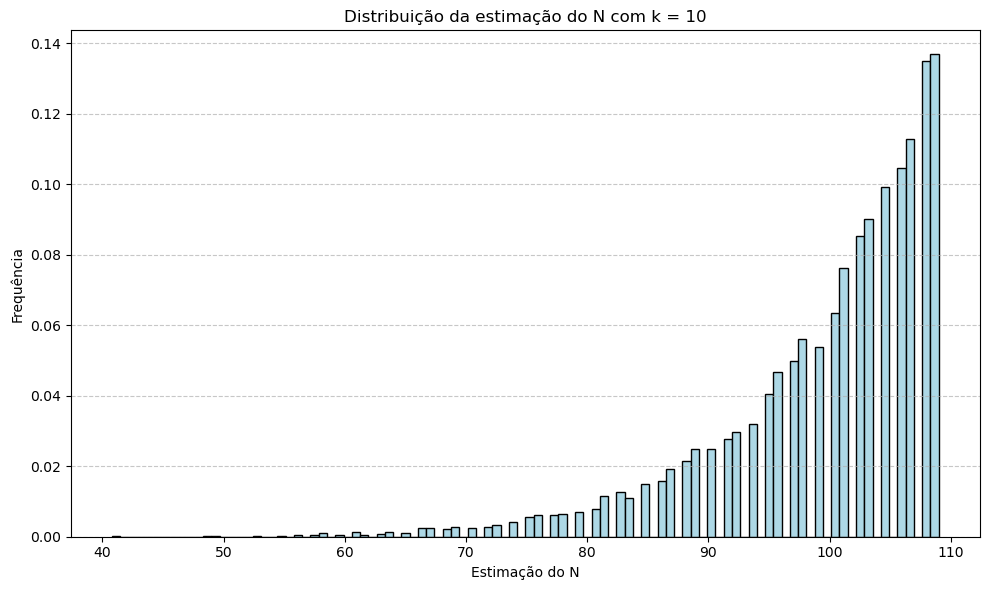

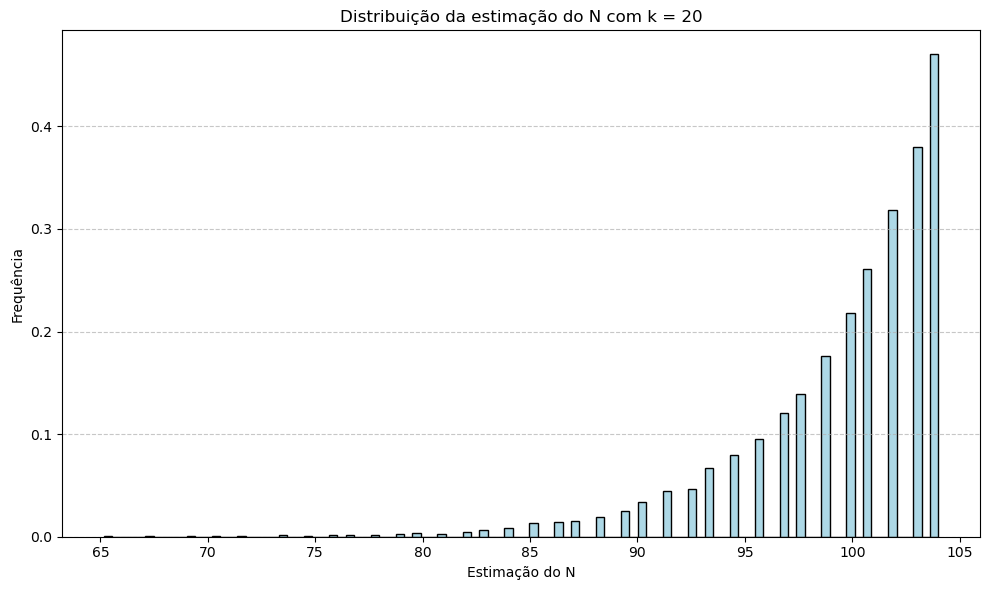

In [ ]:
from numpy.random import seed
import matplotlib.pyplot as plt

seed(1)
tamanhos_amostra = [2,5,10,20]

for k in tamanhos_amostra:
    estimativas = problema_dos_tanques(k)
    
    plt.figure(figsize=(10, 6))
    plt.hist(estimativas, bins=100, color='lightblue', edgecolor='black', density=True)
    plt.xlabel('Estimação do N')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição da estimação do N com k = {k}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
    
    
# Observa-se que quanto maior o k, menor o intervalo definido no eixo x (e menos distribuído ele fica)
# Mais ele tem certeza do valor de N, pois quanto maior o tam da amostra, maior 
# a chance de encontrar o valor máximo mais próximo de N = 100



Rodamos um loop com os tamanhos da amostra = [2,5,10,20] para chamar a função `problema_dos_tanques(k)`.

Observa-se que quanto maior o k, menor o intervalo definido no eixo x (e menos distribuído ele fica).

Mais ele tem certeza do valor de N, pois quanto maior o tam da amostra, maior a chance de existir algum valor aleatório máximo dentro da amostra que seja próximo de N=100.






(vi) Proponha um intervalo de confiança para N com base nas simulações. Discuta se o verdadeiro valor (N = 100) costuma estar dentro do intervalo estimado.

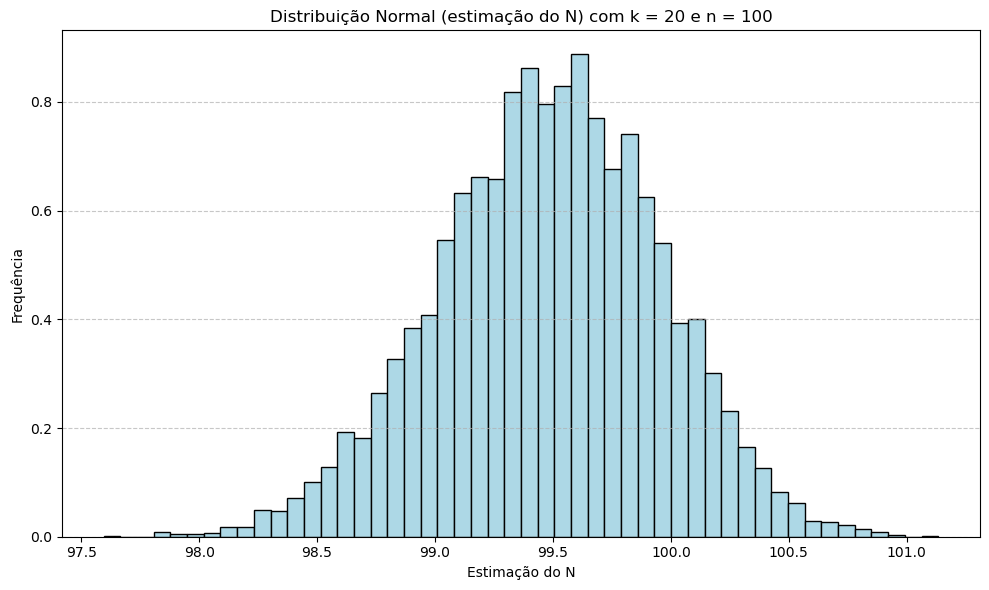

X (barra) =  99.48202325
Intervalo de confiança de 95%: [98.52949999999998, 100.35650000000001]


In [ ]:
from numpy.random import seed
seed(1)



k = 20
estimativas_N = problema_dos_tanques(k)# Pegar estimativas para N, utlizando k = 20



# Nota-se que a distribuição da variável aleatória N não segue um padrão da Normal
simulacoes = 10000 # loop de simulacoes
estimativas = []
n = 100
for _ in range(simulacoes):
    amostra = np.random.choice(estimativas_N, size=n)
    estimativas.append(amostra.mean())

plt.figure(figsize=(10, 6))
plt.hist(estimativas, bins=50, color='lightblue', edgecolor='black', density=True)
plt.xlabel('Estimação do N')
plt.ylabel('Frequência')
plt.title(f'Distribuição Normal (estimação do N) com k = {k} e n = {n}')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
    



# Intervalo de confiança empírico de 95%
ic_inf = np.percentile(estimativas, 2.5)
ic_sup = np.percentile(estimativas, 97.5)


print("X (barra) = ", np.mean(estimativas))
print(f"Intervalo de confiança de 95%: [{ic_inf:.4f}, {ic_sup:.4f}]")



Para trazermos um intervalo de confiança, é importante que a distribuição seja próxima a uma distribuição normal.

No entanto, nota-se que a distribuição da variável aleatória N não segue um padrão da Normal

Para isso, criamos um simulações com k = 20 e fazemos 10.000 simulações pegando n = 100 amostras aleatórias e calculamos a sua média.

O resultado é uma nova distribuição que segue o padrão da normal.

Fazemos o cálculo do primeiro percentil, 2.5 --> (alpha/2), onde alpha = 1 - 95%
E encontramos o segundo percentil, 97.5 --> (95% + alpha/2)




(vii) Contextualização histórica: Pesquise brevemente como esse problema foi utilizado durante a Segunda Guerra Mundial. Comece sua pesquisa pela entrada correspondente na Wikipedia. Quais foram as conclusões reais tiradas a partir dos números de série? Comente a importância histórica da inferência estatística nesse contexto.

A inteligência militar estimou, com base em números de série, que estavam sendo produzidos 
cerca de 246 tanques por mês.

Já a inteligência tradicional dos aliados (espionagem, interceptações etc.) 
estimavam mais de 1.400 tanques por mês entre Junho 1940 e Setembro 1942

Após a guerra, os registros oficiais da Alemanha mostram:

| Mês/Ano       | Estimativa Estatística | Estimativa de Inteligência | Registros Alemães |
|---------------|------------------------|-----------------------------|--------------------|
| Junho/1940    | 169                    | 1.000                       | 122                |
| Junho/1941    | 244                    | 1.550                       | 271                |
| Agosto/1942   | 327                    | 1.550                       | 342                |




## Questão 3 - Diferença de médias

Considere que um pesquisador tenha desenvolvido um medicamento que supostamente melhora a memória. Considere duas populações hipotéticas: o desempenho das pessoas em um teste de memória se elas tiverem tomado o
medicamento e o desempenho das pessoas se não tiverem. Suponha que a média (μ) e a variância (σ^2) da distribuição das pessoas que tomam o medicamento sejam 50 e 25, respectivamente, e que a média (μ) e a variância
(σ^2) da distribuição das pessoas que não tomam o medicamento sejam 40 e 24, respectivamente. Segue-se que o medicamento, em média, melhora o desempenho no teste de memória em 10 pontos. Essa melhora de 10 pontos é
para toda a população. Agora, considere a distribuição amostral da diferença entre as médias. Essa distribuição pode ser entendida pensando no seguinte plano amostral:

1. Produzir uma amostra de n1 escores da população de pessoas que tomam o medicamento e computar a média. Essa média será designada como M1.
2. Em seguida, produzir uma amostra de n2 escores da população de pessoas que não tomam o medicamento e computar a média. Essa média será designada como M2.
3. Calcular a diferença entre M1 e M2. Essa diferença será chamada de Md, onde o d significa “diferença”. Esta é o estatística cuja distribuição amostral é de interesse.

(i) Produza um histograma que aproxima a distribuição amostral de Md. Dica: repita os passos
do plano amostra descrito 10000 vezes. Em seguida, crie o histograma solicitado com os 10000 valores produzidos

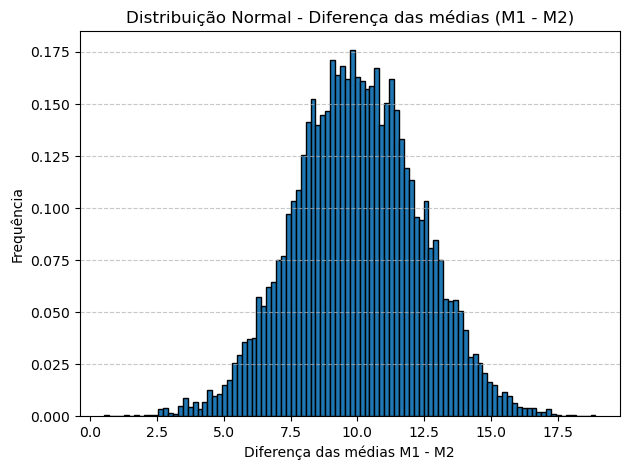

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)

mu1 = 50  # Média e desvio_padrao com medicamento
mu2 = 40  # Média e desvio_padrao sem medicamento


# Tamanho da amostra
n1 = 10
n2 = 8  


variancia1 = 25
variancia2 = 24
desvio_padrao1 = math.sqrt(variancia1)
desvio_padrao2 = math.sqrt(variancia2)


simulacoes = 10000 # 10.000 simulações
diferencas = []

# Simulações
for _ in range(simulacoes):
    amostra1 = np.random.normal(mu1, desvio_padrao1, n1) # média, sigma, sample size
    amostra2 = np.random.normal(mu2, desvio_padrao2, n2)
    
    M1 = np.mean(amostra1)
    M2 = np.mean(amostra2)
    
    D = M1 - M2
    diferencas.append(D)

# Transformar em numpy array
Md = np.array(diferencas)

plt.Figure(figsize=(7,10))

plt.hist(Md, bins=100, edgecolor='black', density=True)
plt.xlabel('Diferença das médias M1 - M2')
plt.ylabel('Frequência')
plt.title('Distribuição Normal - Diferença das médias (M1 - M2)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Criamos uma amostra aleatória para os usuários que tomam medicamento e os que não tomam.
Passamos os hiperparâmetros criados `np.random.normal(mu1, desvio_padrao1, n1)`, a média da população, sigma e sample size.
Depois fazemos a média encontrada para cada uma das amostras e armazenamos em M1 e M2. Por fim, fazemos uma diferença entre as duas, `D = M1 - M2`. Realizamos esse processo em 10.000 simulações.

Por fim, plotamos essa distribuição em um histograma.

(ii) Usando a aproximação da distribuição amostral de Md obtida no item
anterior, compute aproximações para a média e o desvio padrão dessa
estatística. Os valores que você obteve são próximos aos fornecidos
acima? Explique.

In [ ]:
print(f"Média: {Md.mean()}") # média dada pelo enunciado: 10

print(f"Desvio padrão: {Md.std()}") # Desvio padrão dado pelo enunciado: 2.35 (se n1 = 10 e n2 = 8)


# Quando se tem duas amostras independentes, com distribuições normais, 
# a diferença entre as médias (M1 - M2) segue também uma distribuição normal !

# Então, ao simular 10.000 vezes e calcular o desvio padrão das diferenças observadas 
# (Md.std()), obtém-se um valor muito próximo do valor teórico.



Média: 9.984133874952184
Desvio padrão: 2.338557409786655


A média dada pelo enunciado: 10
A média encontrada na distribuição: Média: 9.9841

Desvio padrão dado pelo enunciado: 2.35 (se n1 = 10 e n2 = 8)
Desvio padrão encontrado na implementação: Desvio padrão: 2.33855

Ambos os valores encontrados são praticamente iguais aos do enunciado.
Quando se tem duas amostras independentes, com distribuições normais, a diferença entre as médias (M1 - M2) segue também uma distribuição normal !

Então, ao simular 10.000 vezes e calcular o desvio padrão das diferenças observadas (Md.std()), obtém-se um valor muito próximo do valor teórico.



(iii) Uma vez conhecidos a média e o erro padrão da distribuição amostral de
uma estatística, é possível responder a diversas perguntas. Para o caso
da estatística aqui mencionada (diferença entre as médias), responda
a seguinte pergunta: Se um experimento com o medicamento para a
memória descrito for realizado, qual é a probabilidade de a média do
grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos
maior do que a média dos 8 sujeitos que não receberam o medicamento?

In [ ]:
from scipy.stats import norm

Z_score = (15 - Md.mean())/Md.std()

print(f"Probabilidade de {100*(1 - norm.cdf(Z_score)):.4f}%")

2.144854816929814
Probabilidade de 1.5982%


Probabilidade de 1.5982%

Realizamos esse cálculo com ajuda da função `norm.cdf(Z_score)`, passando Z_score como parâmetro. 

No Z_score, colocamos o X procurado, neste caso, 15 pontos.

Fazendo 1 - norm.cdf, encontramos os valores à direita da distribuição normal, o que nos representa 15 ou mais pontos.

## Questão 4 - Áudio ou texto?

O conjunto de dados fornecido para realizar essa parte do trabalho está no
arquivo SchroederEpley2015data.txt. Nesse conjunto de dados, há várias
colunas. Contudo, há duas colunas de interesse para esta parte do trabalho.
- a coluna CONDITION indica o condição à qual cada recrutador foi alocador.
O valor 1 indica que o recrutador foi alocado na condição de
áudio; O valor 0 indica que o recrutador foi alocado na condição de
transcrição.
- a coluna Intellect_Rating indica a avaliação que cada recrutador
atribuiu ao candidato. Essa avaliação é um valor inteiro entre 0 e 10.

(i) Compute a média e o tamanho (quantidade de observações) tanto para
Sa quanto St.

In [1]:
import pandas as pd

pathfile = "C:/Users/parai/Documents/Github - Inference/Inferencia_Estatistica/SchroederEpley2015data.txt"
df = pd.read_csv(pathfile, delimiter=',')

St = df[df['CONDITION'] == 0]
Sa = df[df['CONDITION'] == 1]

print("Média de 'Intellect_Rating' de St: ",St['Intellect_Rating'].mean())
print("Comprimento de St: ", len(St['Intellect_Rating']))

print("Média de 'Intellect_Rating' de Sa: ",Sa['Intellect_Rating'].mean())
print("Comprimento de Sa: ", len(Sa['Intellect_Rating']))



Média de 'Intellect_Rating' de St:  3.6481481481481493
Comprimento de St:  18
Média de 'Intellect_Rating' de Sa:  5.634920634920636
Comprimento de Sa:  21


criamos um dataframe a partir do [SchroederEpley2015data.txt](../SchroederEpley2015data.txt)

E separamos os dados de acordo com o seu 'CONDITION'
`St = df[df['CONDITION'] == 0]`


e printamos algumas informações importantes



Média de 'Intellect_Rating' de St:  3.6481

Comprimento de St:  18

Média de 'Intellect_Rating' de Sa:  5.6349

Comprimento de Sa:  21

(ii) Construa um boxplot para apresentar graficamente as duas amostras.
Seu gráfico deve ser semelhante ao apresentado na Figura 1. Em
Python, você pode usar a biblioteca Seaborn5. Em R, você pode usar
a biblioteca GGPLOT26. Forneça uma análise das informações fornecidas
pelo gráfico.

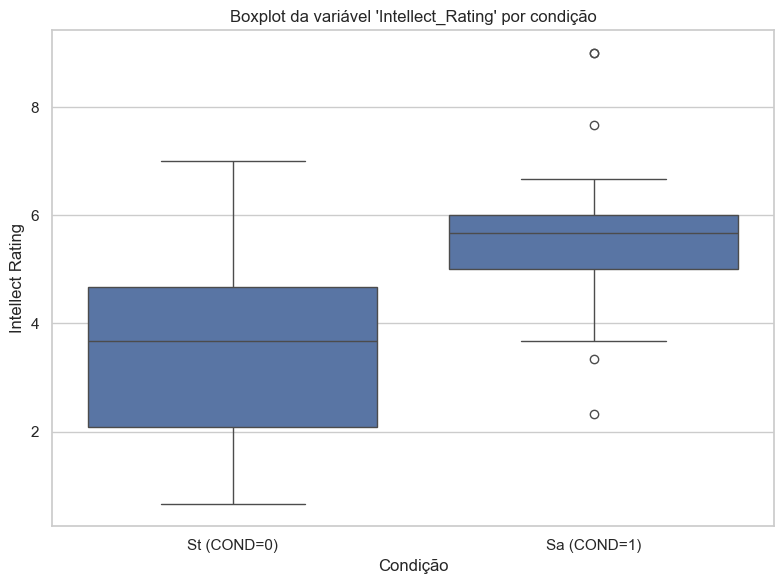

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


colors = {0: 'cyan', 1: 'orange'}
sns.set_theme(style='whitegrid')


# Cria o boxplot
plt.figure(figsize=(8, 6))


sns.boxplot(data=df, x='CONDITION', y='Intellect_Rating')

# Ajusta os rótulos e título
plt.xticks([0, 1], ['St (COND=0)', 'Sa (COND=1)'])
plt.title("Boxplot da variável 'Intellect_Rating' por 'CONDITION'")
plt.xlabel("Condição")
plt.ylabel("Intellect Rating")

# Mostra o gráfico
plt.tight_layout()
plt.show()

Criamos um boxplot utilizando a função do seaborn
`sns.boxplot(data=df, x='CONDITION', y='Intellect_Rating')`



(iii) Aplique um teste de normalidade em ambas as amostras, Sa e St. Apresente
uma análise do resultado obtido.

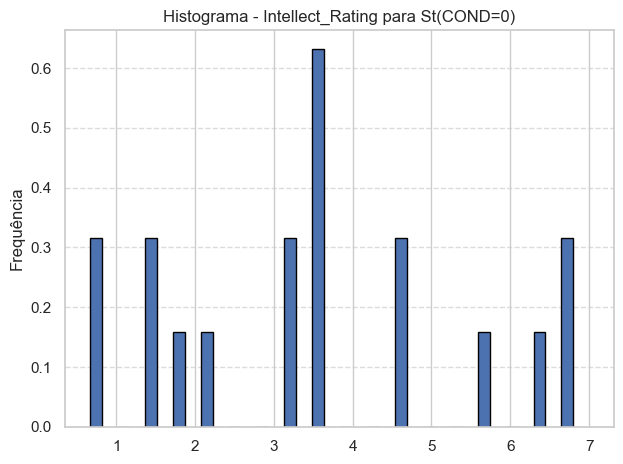

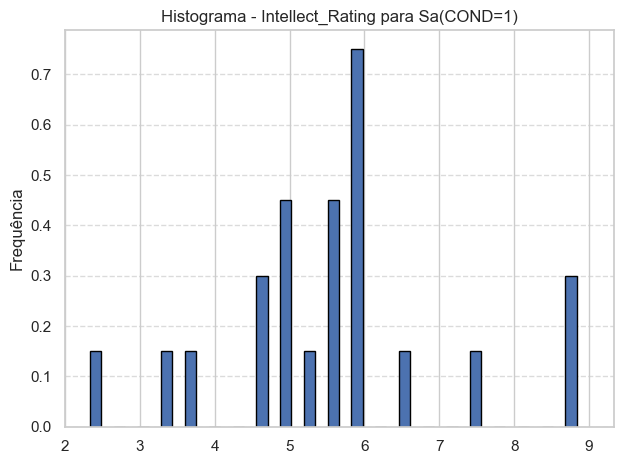

In [ ]:
import matplotlib.pyplot as plt

# Ao ver que quando criamos plotamos St e Sa em um histograma,
# é possível observar que a distribuição não têm uma forma de distribuição Normal

plt.Figure(figsize=(7,10))
plt.hist(St['Intellect_Rating'], bins=len(St), edgecolor='black', density=True, width=0.15)
plt.ylabel('Frequência')
plt.title('Histograma - Intellect_Rating para St(COND=0)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.Figure(figsize=(7,10))
plt.hist(Sa['Intellect_Rating'], bins=len(Sa), edgecolor='black', density=True, width=0.15)
plt.ylabel('Frequência')
plt.title('Histograma - Intellect_Rating para Sa(COND=1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Quando plotamos St e Sa em um histograma, é possível observar que a distribuição não têm uma forma de distribuição Normal

(iv) Construa um intervalo de confiança para a média de avaliações produzidas
por duas populações distintas, P1 e P2, descritas abaixo.

- P1: todos os recrutadores que ouvem os áudios
- P2: todos os recrutadores que leem os transcritos


Note que a resposta a este item devem ser dois intervalos de confiança.
Nos dois casos, use o nível de confiança de 99%.

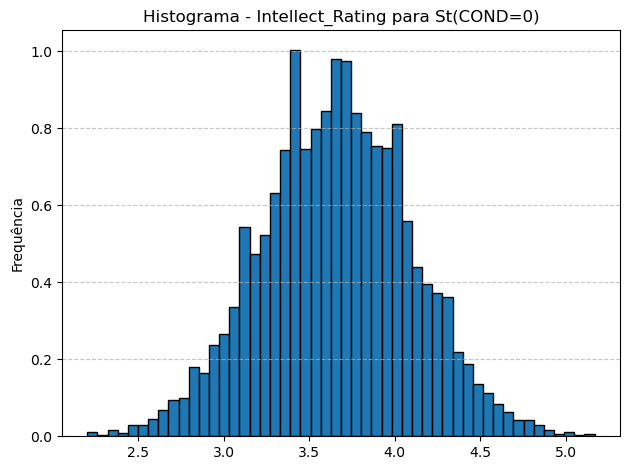

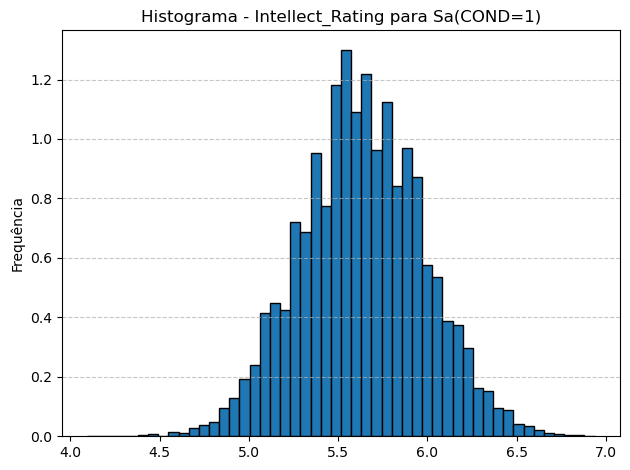

IC de 99% para P1: [2.5556, 4.7963]
IC de 99% para P2: [4.7460, 6.5238]


In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)

# St --> COND = 0
# Sa --> COND = 1

n1 = len(St)
n2 = len(Sa)
simulacoes = 10000 # 10.000 simulações

media_P1 = [] # St
media_P2 = [] # Sa

# Simulações - transformar em distribuição normal
for _ in range(simulacoes):
    amostra_st = np.random.choice(St['Intellect_Rating'], size=n1)
    amostra_sa = np.random.choice(Sa['Intellect_Rating'], size=n2)
    
    media_P1.append(np.mean(amostra_st))
    media_P2.append(np.mean(amostra_sa))
    
P1 = np.array(media_P1)
P2 = np.array(media_P2)

plt.Figure(figsize=(7,10))
plt.hist(P1, bins=50, edgecolor='black', density=True)
plt.ylabel('Frequência')
plt.title('Histograma - Intellect_Rating para St(COND=0)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.Figure(figsize=(7,10))
plt.hist(P2, bins=50, edgecolor='black', density=True)
plt.ylabel('Frequência')
plt.title('Histograma - Intellect_Rating para Sa(COND=1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Intervalo de confiança empírico de 99%
ic_inf_P1 = np.percentile(P1, 0.5)
ic_sup_P1 = np.percentile(P1, 99.5)
print(f"IC de 99% para P1: [{ic_inf_P1:.4f}, {ic_sup_P1:.4f}]")
ic_inf_P2 = np.percentile(P2, 0.5)
ic_sup_P2 = np.percentile(P2, 99.5)
print(f"IC de 99% para P2: [{ic_inf_P2:.4f}, {ic_sup_P2:.4f}]")




    
A partir de 10.000 simulações, criamos 2 amostras:
    `amostra_st = np.random.choice(St['Intellect_Rating'], size=n1)`
    `amostra_sa = np.random.choice(Sa['Intellect_Rating'], size=n2)`

n1 ou n2 valores aleatórios de 'intellect_rating' contidos em St e Sa.

Depois, criamos os histogramas para o caso de CONDITON = 1 e CONDITION = 0

(v) Com base nos intervalos de confiança obtidos no item anterior, você
acha que a conclusão a que chegaram os autores em Schroeder and
Epley (2015) é válida? Justifique sua resposta.

"These evaluators rated a candidate as more competent, thoughtful, 
and intelligent when they heard a pitch rather than read it"

Sim, podemos observar que, dado o intervalo de confiança de 99% obtido na questão anterior,
As médias para candidatos que foram ouvidos por áudio tiveram maior escore em comparação com os que só tiveram o seu discurso lido.

## Questão 5 - Intervalo de confiança para altura média

Essa parte do trabalho envolve computar um intervalo de confiança para a
média das alturas dos estudantes de uma universidade. Você deve realizar
essa parte do trabalho usando como amostra os dados contidos no conjunto de dados fornecido no arquivo survey.csv. Esse conjunto de dados contém
o resultado de uma pesquisa feita com uma amostra de estudantes em uma
universidade australiana. Os atributos desse conjunto de dados são descritos
a seguir.

- Sex. O sexo do aluno. (Fator com os níveis Male e Female.)
- Wr.Hnd. vão (distância da ponta do polegar à ponta do dedo mínimo
da mão aberta) da mão que escreve, em centímetros.
- NW.Hnd. extensão da mão que não escreve.
- W.Hnd. mão de escrita. (Left ou Right.)
- Fold. ”Cruze os braços! Qual está no topo? (R on L, L on R, Neither.)
- Pulse. taxa de pulso do aluno (batimentos por minuto).
- Clap. ’Bata palmas! Qual mão está para cima? (Right, Left,None.)
- Exer. quantas vezes o aluno se exercita. (Freq (frequentemente), Some,
None.)
- Smoke. Quanto o aluno fuma. (Heavy, Regul (regularmente), Occas
(occasionalmente), Never.)
- Height. altura do aluno em centímetros.
- M.I. se o aluno expressou a altura em unidades imperiais (pés/polegadas)
ou métricas (centímetros/metros). (Metric, Imperial.)
- Age. Idade do aluno em anos.

A variável de interesse está na coluna Height do conjunto de dados. Inicialmente,
você deve eliminar valores faltantes (missing values) nessa coluna.
Para isso, pesquise sobre a função na.omit7 da linguagem R, ou sobre a
função drop.na8 da biblioteca Pandas em Python.
Agora, realize o que se pede a seguir.

(i) Usando a distribuição t de Student, calcule um intervalo de confiança
no nível de 95% para a altura média dos estudantes da universidade.

In [1]:
import pandas as pd

pathfile = "C:/Users/parai/Documents/Github - Inference/Inferencia_Estatistica/survey.csv"
df_survey = pd.read_csv(pathfile)
df_survey.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [ ]:
from scipy import stats
import numpy as np

# Dist t de student pode ser usado para quando a amostra é n < 30

heights = df_survey['Height'].dropna()  # remove valores nulos
print("len de Heights: ", len(heights))

# Estatísticas básicas
n = len(heights) # 209 (n>30)
mean = heights.mean()


# Valor crítico t (para 95% de confiança, bicaudal)
alpha = 0.05
t_critical = stats.t.ppf(alpha/2, df=n-1)
print("T crítico: ", t_critical)


s = np.std(heights, ddof = 1)
# o uso de ddof=1 faz com que a fórmula do desvio padrão amostral s seja usada, 
# e não a fórmula do desvio padrão populacional 

erro_padrao = np.abs(t_critical * s/np.sqrt(n))


print(f"Média da altura: {mean:.2f}")
print("IC(95): [%.2f, %.2f]" % (mean-erro_padrao, mean+erro_padrao))


len de Heights:  209
T crítico:  -1.9714346585183509
Média da altura: 172.38
IC(95): [171.04, 173.72]


Instanciamos o dataframe survey.csv em 'df_survey'.

Pegamos as alturas e removemos valores nulos usando `df_survey['Height'].dropna()`.

A Distribuição t de student pode ser usado para quando a amostra é n < 30. Mas nesse caso, o tamanho total de alturas é n=209.



Calculamos o Valor crítico t (para 95% de confiança, bicaudal), com alpha = 0.05 e n-1 graus de liberdade.
`t_critical = stats.t.ppf(alpha/2, df=n-1)`


Calculamos o desvio padrão amostral
`s = np.std(heights, ddof = 1)`
O uso de ddof=1 faz com que a fórmula do desvio padrão amostral s seja usada e não a fórmula do desvio padrão populacional.

Calculamos o erro a partir de 
`erro_padrao = np.abs(t_critical * s/np.sqrt(n))`
Pegamos o valor absoluto pois t_critical está pegando o T crítico à esquerda, que é negativo.

O intervalo está denotado em (mean-erro_padrao, mean+erro_padrao)


(ii) Construa outro intervalo de confiança, desta vez usando o z-score (em
vez do t-score que você usou anteriormente).

In [11]:
from scipy.stats import norm
import numpy as np

heights = df_survey['Height'].dropna()  # remove valores nulos
print("len de Heights: ", len(heights))


# Estatísticas básicas
n = len(heights) # 209 (n>30)
mean = heights.mean()



# Valor crítico Z (para 95% de confiança, bicaudal)
alpha = 0.05
z_critical = stats.norm.ppf(alpha/2) 
print("Z crítico: ", z_critical)


std = heights.std()

erro_padrao = np.abs(z_critical * std/np.sqrt(n))


print(f"Média da altura: {mean:.2f}")
print("IC(95): [%.2f, %.2f]" % (mean-erro_padrao, mean+erro_padrao))


len de Heights:  209
Z crítico:  -1.9599639845400545
Média da altura: 172.38
IC(95): [171.05, 173.72]


Aqui, ao invés de pegar o t_critico, pegamos o z_critico a partir de `z_critical = stats.norm.ppf(alpha/2) `, para alpha = 0.05, garantindo IC de 95%.

Calculamos o erro padrão da mesma forma:
`erro_padrao = np.abs(z_critical * std/np.sqrt(n))`

E obtemos o IC: (mean-erro_padrao, mean+erro_padrao)


(iii) Apresente uma análise comparativa dos dois intervalos de confiança
obtidos.

Com n pequeno, o intervalo com t tende a ser mais largo, pois ele compensa a maior incerteza por não conhecer o desvio padrão populacional.

Com n grande (n > 30), os dois valores (t e z) se aproximam bastante e os intervalos e quase não diferem.

Ou seja, com n > 30, a distribuição t de student se aproxima muito da normal

Como o nosso caso n = 209, temos uma alta aproximação

## Questão 6 - Intervalo de Confiança para Proporção

Nesta parte do trabalho, você deve considerar a mesma amostra contida
no conjunto de dados survey. Dessa vez, você deve produzir um intervalo
de confiança para a proporção de alunos da universidade que são canhotos.
Sendo assim, dessa vez a coluna de interesse é W.Hnd.

(i) Primeiramente, se certifique de que existem pelo menos 10 estudantes
destros e pelo menos 10 estudantes canhotos, para que você possa
realizar a construção do intervalo de confiança de forma satisfatória.

In [ ]:
import pandas as pd
import numpy as np

pathfile = "C:/Users/parai/Documents/Github - Inference/Inferencia_Estatistica/survey.csv"
df_survey = pd.read_csv(pathfile)

W_Hand = df_survey['W.Hnd'].dropna()  # remove valores nulos


Right_handed = df_survey[df_survey['W.Hnd']=='Right']
Left_handed = df_survey[df_survey['W.Hnd']=='Left']

assert(len(Right_handed)>10 and len(Left_handed)>10)

Instanciamos o dataset survey.csv em df_survey e extraímos a coluna sendo estudada 'W.Hnd' já sem linhas nulas.

Garantimos que existem pelo menos 10 amostras tanto para os que são destros e canhotos com assert.

(ii) Produza o intervalo de confiança solicitado, usando o nível de confiança
90%. Junto com o resultado, forneça também uma análise.

In [ ]:
# Faremos uma distribuição de p^   --> proporção de alunos que são canhotos

# dataset:
# 1 --> portador da característica (canhoto)
# 0 --> se não for (destro)


# Como regra prática, o procedimento a seguir deve ser usado apenas quando a 
# amostra contiver pelo menos 10 sucessos e 10 falhas.

from scipy.stats import norm

confidence_level = 0.90
alfa = 1 - confidence_level

critical_value = np.absolute(norm.ppf(alfa/2))
print("critical value: %.2f" % critical_value)

p_hat = len(Left_handed)/len(W_Hand)
print("P_hat: %.2f" % p_hat)
n = len(W_Hand)

# Margem de erro utilizando a fórmula

# para n grande (n>30), o TLC nos permite considerar a distribuição amostral de P^
# como sendo aproximadamente normal:

# p^  =  N(p, p(1-p)/n)
# Dito isso, a fórmula de ME = valor_critico * σ
# Nesse caso, σ = sqrt(p(1-p)/n)
se = np.sqrt((p_hat * (1 - p_hat)) / n)

errorMargin = critical_value * se


print("IC(90): [%.2f, %.2f]" % (p_hat-errorMargin, p_hat+errorMargin))



critical value: 1.64
P_hat: [0.08]
IC(90): [0.05, 0.10]


Neste caso, fizemos uma distribuição de p^, representando uma proporção de alunos que são canhotos

A coluna W.Hnd possui valores 0 ou 1:
1 --> portador da característica (canhoto)
0 --> se não for (destro)


Como regra prática, o procedimento deve ser usado apenas quando a amostra contiver pelo menos 10 sucessos e 10 falhas, por isso nos asseguramos que existiam pelo menos 10 amostras de cada na última questão.

Pegamos o Z_critico: `critical_value = np.absolute(norm.ppf(alfa/2))`

Calculamos o p^, representado por p_hat, usando `p_hat = len(Left_handed)/len(W_Hand)`.

Margem de erro utilizando a fórmula para n grande (n>30), o TLC nos permite considerar a distribuição amostral de p^ como sendo aproximadamente normal: `p^  =  N(p, p(1-p)/n)`


Dito isso, encontramos a Margem de Erro a partir do valor_critico * se, tendo em vista o `se = np.sqrt((p_hat * (1 - p_hat)) / n)`


Por fim obtemos o IC (90): (p_hat-errorMargin, p_hat+errorMargin)
IC(90): [0.05, 0.10]



(iii) Produza o intervalo de confiança solicitado, usando o nível de confiança
95%. Junto com o resultado, forneça também uma análise e compare
com o resultado obtido no item anterior.

In [26]:
# dataset:
# 1 --> portador da característica (canhoto)
# 0 --> se não for (destro)

from scipy.stats import norm

confidence_level = 0.95
alfa = 1 - confidence_level

critical_value = np.absolute(norm.ppf(alfa/2))
print("critical value: %.2f" % critical_value)

p_hat = len(Left_handed)/len(W_Hand)
print("P_hat: %.2f" % p_hat)
n = len(W_Hand)

se = np.sqrt((p_hat * (1 - p_hat)) / n)

errorMargin = critical_value * se


print("IC(95): [%.2f, %.2f]" % (p_hat-errorMargin, p_hat+errorMargin))



critical value: 1.96
P_hat: 0.08
IC(95): [0.04, 0.11]


Em relação a última pergunta somente modificamos o valor de confidence level de 0.9 para 0.95.

O resultado foi que o intervalo de confiança ficou mais largo. Passou de IC(90): [0.05, 0.10] para IC(95): [0.04, 0.11].

Somente aumentando o comprimento do intervalo é possível aumentar o nível de confiança do IC.

(iv) Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

In [ ]:
import pandas as pd

pathfile = "C:/Users/parai/Documents/Github - Inference/Inferencia_Estatistica/survey.csv"
df_survey = pd.read_csv(pathfile)

Sex = df_survey['Sex'].dropna()  # remove valores nulos


Male = df_survey[df_survey['Sex']=='Male']
Female = df_survey[df_survey['Sex']=='Female']

assert(len(Male)>10 and len(Female)>10)

118
118


Extraimos a coluna 'Sex' e separamos entre Sexo masculino e feminino. Após isso verificamos se o tamanho excede 10 para cada um.

In [30]:
# Faremos uma distribuição de p^   --> proporção de males e females

from scipy.stats import norm

confidence_level = 0.90
alfa = 1 - confidence_level

critical_value = np.absolute(norm.ppf(alfa/2))
print("critical value: %.2f" % critical_value)

p_hat = len(Female)/len(Sex) # proporção de mulheres na pesquisa
print("P_hat: %.2f" % p_hat)
n = len(Sex)

# Margem de erro utilizando a fórmula

se = np.sqrt((p_hat * (1 - p_hat)) / n)

errorMargin = critical_value * se


print("IC(90): [%.2f, %.2f]" % (p_hat-errorMargin, p_hat+errorMargin))



critical value: 1.64
P_hat: 0.50
IC(90): [0.45, 0.55]


Fizemos uma distribuição de p^

Pegamos o Z_critico: `critical_value = np.absolute(norm.ppf(alfa/2))`

Calculamos o p^, representado por p_hat, usando `p_hat = len(females)/len(Sex)`.

Margem de erro utilizando a fórmula para n grande (n>30), o TLC nos permite considerar a distribuição amostral de p^ como sendo aproximadamente normal: `p^  =  N(p, p(1-p)/n)`


Dito isso, encontramos a Margem de Erro a partir do valor_critico * se, tendo em vista o `se = np.sqrt((p_hat * (1 - p_hat)) / n)`


Por fim obtemos o IC (90): (p_hat-errorMargin, p_hat+errorMargin)
IC(90): [0.45, 0.55]

O intervalo circunda 0.50, visto que a quantidade de pessoas do sexo feminino e masculino são iguais.



In [32]:
# Faremos uma distribuição de p^   --> proporção de males e females

from scipy.stats import norm

confidence_level = 0.95
alfa = 1 - confidence_level

critical_value = np.absolute(norm.ppf(alfa/2))
print("critical value: %.2f" % critical_value)

p_hat = len(Female)/len(Sex) # proporção de mulheres na pesquisa
print("P_hat: %.2f" % p_hat)
n = len(Sex)

# Margem de erro utilizando a fórmula

se = np.sqrt((p_hat * (1 - p_hat)) / n)

errorMargin = critical_value * se


print("IC(95): [%.2f, %.2f]" % (p_hat-errorMargin, p_hat+errorMargin))



critical value: 1.96
P_hat: 0.50
IC(95): [0.44, 0.56]


Observa-se que o intervalo aumentou de [0.45, 0.55] para [0.44, 0.56] visto que aumentamos o seu intervalo de confiança.

(v) A amostra correspondente ao conjunto de dados survey tem tamanho
suficiente para produzir um intervalo de confiança para a característica
Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais?
Se sim, construa esse intervalo de confiança usando nível de confiança
90%. Se não, explique.

In [ ]:
from scipy.stats import norm
import numpy as np

p_hat = len(Female)/len(Sex) # proporção de mulheres na pesquisa
n = len(Sex)
alpha = 0.10
z_90 = abs(norm.ppf(alpha/2) ) # 90% de confiança

# erro amostral
se = np.sqrt((p_hat * (1 - p_hat)) / n)
E = z_90 * se

print("Margem de erro: %.4f (%.2f%%)" % (E, E*100))

# Não, a amostra não é suficiente para garantir uma margem de erro de 
# apenas 2 pontos percentuais (0.02) com 90% de confiança. A margem de 
# erro atual está em torno de 5.36%, bem acima.

Não, a amostra não é suficiente para garantir uma margem de erro de apenas 2 pontos percentuais (0.02) com 90% de confiança. A margem de erro atual está em torno de 5.36%, bem acima.